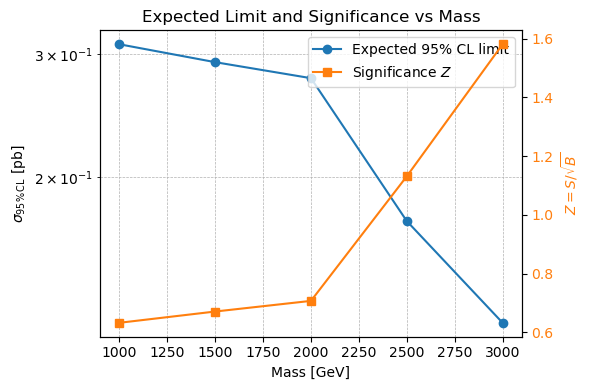

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ▶ 1) 입력: mass points, background & signal yields (weight로 계산된)
mass = np.array([1000, 1500, 2000, 2500, 3000])     # [GeV]
B    = np.array([  10,   5,    2,    0.5,  0.1])     # background yields
S    = np.array([   2,   1.5,  1.0,  0.8,  0.5])     # signal yields for a reference σ_ref

# ▶ 2) 분석 럼 (fb^-1) 과 reference cross section (pb)
L_fb       = 300.0     # in fb^-1
sigma_ref  = 0.1       # pb, signal yields S were computed at this σ_ref

# ▶ 3) signal efficiency (yield per unit σ)
#    S = σ_ref * L_fb * ε  →  ε = S / (σ_ref * L_fb)
eps = S / (sigma_ref * L_fb)

# ▶ 4) 95% CL limit: approximate by s95 = 1.96 * √B (Gaussian) → σ95 = s95 / (ε * L)
s95 = 1.96 * np.sqrt(B)
sigma95_pb = s95 / (eps * L_fb)     # in pb

# ▶ 5) significance Z = S / √B
Z = S / np.sqrt(B + 1e-9)           # +small to avoid div0

# ▶ 6) Plotting
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(mass, sigma95_pb, marker='o', label='Expected 95% CL limit')
ax.set_yscale('log')
ax.set_xlabel('Mass [GeV]')
ax.set_ylabel(r'$\sigma_{95\%\,\mathrm{CL}}$ [pb]')
ax.grid(True, which='both', ls='--', lw=0.5)

# significance on second y-axis
ax2 = ax.twinx()
ax2.plot(mass, Z, marker='s', color='C1', label='Significance $Z$')
ax2.set_ylabel('$Z = S/\\sqrt{B}$', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines+lines2, labels+labels2, loc='upper right')

plt.title('Expected Limit and Significance vs Mass')
plt.tight_layout()


